# Importing the Libraries

In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,auc
import pickle
from sklearn.ensemble import ExtraTreesRegressor

# Loading the Data

In [66]:
df = pd.read_csv("stock_data (1).csv") #
df.head()

,Close/Last,Volume,Open,High,Low,New Closing Price,Day,Month,Year
0,36.29,32739565,37.60,37.65,35.638,0.00,14,11,2016
1,10.86,48842780,10.68,10.93,10.640,0.31,15,12,2016
2,10.55,46878230,10.43,10.74,10.270,0.01,14,12,2016
3,10.54,46660430,10.75,10.80,10.400,-0.14,13,12,2016
4,10.68,63255660,10.40,10.93,10.380,0.34,12,12,2016


#Removing the Date Column

In [67]:
df.drop(["Day","Month","Year"],axis = 1, inplace = True)

In [68]:
"""df["Date"] = pd.to_datetime(df["Date"])
df.sort_values(by = "Date",ignore_index= True,inplace= True)
df["Close/Last"] = df["Close/Last"].str.replace("$","").astype(float) #removing the $ sign and converting the column into float dtype
close_list = list(df["Close/Last"])
new_close_list = []
for i in range(len(close_list)):
  if i ==0:
    new_close_list.append(0)
  else:
    new_close_list.append(close_list[i]-close_list[i-1])
df["New Closing Price"] = new_close_list
df.head()

I used this code to add New Closing Price Columns in EDA Notebook
"""


'df["Date"] = pd.to_datetime(df["Date"])\ndf.sort_values(by = "Date",ignore_index= True,inplace= True)\ndf["Close/Last"] = df["Close/Last"].str.replace("$","").astype(float) #removing the $ sign and converting the column into float dtype\nclose_list = list(df["Close/Last"])\nnew_close_list = []\nfor i in range(len(close_list)):\n  if i ==0:\n    new_close_list.append(0)\n  else:\n    new_close_list.append(close_list[i]-close_list[i-1])\ndf["New Closing Price"] = new_close_list\ndf.head()\n\nI used this code to add New Closing Price Columns in EDA Notebook\n'

# Info about the data

In [69]:
df.shape

(2653, 6)

In [70]:
df.isnull().sum()

Close/Last           0
Volume               0
Open                 0
High                 0
Low                  0
New Closing Price    0
dtype: int64

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2653 entries, 0 to 2652
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Close/Last         2653 non-null   float64
 1   Volume             2653 non-null   int64  
 2   Open               2653 non-null   float64
 3   High               2653 non-null   float64
 4   Low                2653 non-null   float64
 5   New Closing Price  2653 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 124.5 KB


In [72]:
df.describe()

,Close/Last,Volume,Open,High,Low,New Closing Price
count,2653.000000,2.653000e+03,2653.000000,2653.000000,2653.000000,2653.000000
mean,49.278815,2.843954e+07,49.254549,49.740520,48.755931,0.073177
std,21.092619,1.322686e+07,21.096481,21.271111,20.883635,0.529867
min,6.790000,5.720538e+06,6.820000,6.840000,6.610000,-1.244000
25%,34.500000,1.816774e+07,34.450000,34.730000,34.230000,-0.252000
50%,47.580000,2.413825e+07,47.490000,47.950000,47.120000,0.042000
75%,62.662000,3.659612e+07,62.700000,63.282000,62.040000,0.390000
max,103.070000,6.469864e+07,103.190000,103.970000,102.000000,1.378000


# Replacing the 0 value in New Closing Price Column with mean

In [73]:
imputer = SimpleImputer(missing_values=0.0,strategy = "mean")
df["New Closing Price"] =imputer.fit_transform(df[["New Closing Price"]])

#Adding the Target Variable

In [74]:
Profit_loss = []
for i in range(len(df)):
  if df["New Closing Price"][i] >0: # 1 for Profit 0 for loss
    Profit_loss.append(1) 
  else:
    Profit_loss.append(0)
df["Profit/Loss"] = Profit_loss

In [75]:
df.head()

,Close/Last,Volume,Open,High,Low,New Closing Price,Profit/Loss
0,36.29,32739565,37.60,37.65,35.638,0.074127,1
1,10.86,48842780,10.68,10.93,10.640,0.310000,1
2,10.55,46878230,10.43,10.74,10.270,0.010000,1
3,10.54,46660430,10.75,10.80,10.400,-0.140000,0
4,10.68,63255660,10.40,10.93,10.380,0.340000,1


# Separating the Independant & Dependant Variable

In [76]:
Input = df.drop("Profit/Loss",axis = 1)
Output = df["Profit/Loss"]

# Count of Profit & Loss

[]

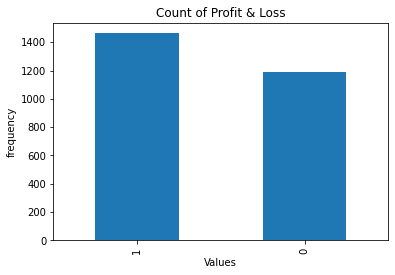

In [77]:
Output.value_counts().plot(kind = "bar")
plt.xlabel("Values")
plt.ylabel("frequency")
plt.title("Count of Profit & Loss")
plt.plot()

#Normalizing the data

In [78]:
inp_col = Input.columns
minmax = MinMaxScaler()
Input = minmax.fit_transform(Input)
Input = pd.DataFrame(Input,columns = inp_col)
Input.head()

,Close/Last,Volume,Open,High,Low,New Closing Price
0,0.306398,0.458120,0.319394,0.317204,0.304309,0.502718
1,0.042273,0.731157,0.040054,0.042109,0.042248,0.592677
2,0.039053,0.697847,0.037460,0.040152,0.038369,0.478261
3,0.038949,0.694154,0.040780,0.040770,0.039732,0.421053
4,0.040403,0.975534,0.037148,0.042109,0.039522,0.604119


#Splitting the data into train and test

In [79]:
X_train,X_test,Y_train,Y_test = train_test_split(Input,Output,test_size = 0.3, random_state = 42)

#Using the Logistic Regression Model

In [80]:
model = LogisticRegression()
model.fit(X_train,Y_train)
model_prediction = model.predict(X_test)

#Test Accuracy

In [81]:
accuracy_score(Y_test,model_prediction)

0.9886934673366834

# Classification Report

In [82]:
print(classification_report(Y_test,model_prediction))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       355
           1       0.98      1.00      0.99       441

    accuracy                           0.99       796
   macro avg       0.99      0.99      0.99       796
weighted avg       0.99      0.99      0.99       796



# Actual Values and Predicted Values

In [83]:
pred = pd.DataFrame({"Actual Value":Y_test,"Predicted Value":model_prediction})
pred.tail()

,Actual Value,Predicted Value
1857,0,0
2524,1,1
742,0,0
2512,1,1
902,0,0


#Confusion Matrix 

In [84]:
conf_matrix = confusion_matrix(Y_test,model_prediction)
conf_matrix

array([[346,   9],
       [  0, 441]])

[]

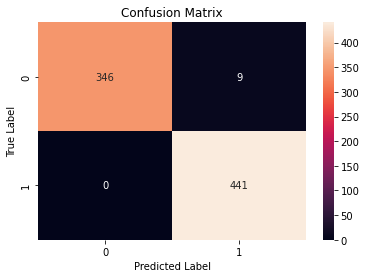

In [85]:
sns.heatmap(conf_matrix,annot = True,fmt = ".3g")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.title("Confusion Matrix")
plt.plot()

#Roc Curve

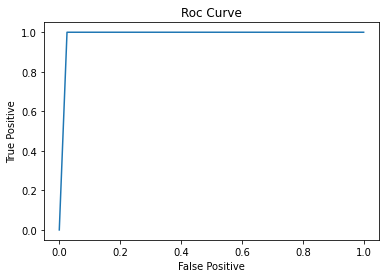

In [86]:
fpr,tpr, threshold = roc_curve(Y_test,model_prediction)
auc_model = auc(fpr,tpr)
plt.plot(fpr,tpr,linestyle = "-")
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.title("Roc Curve")
plt.show()

#Hyperparameter tuning using Grid Search CV


In [87]:
paramters = {
    "penalty":["l2"],
    "max_iter":[100,200,300,400,500],
    "solver":["newton-cg","lbfgs"],
    "C":[0.001,.009,0.01,.09,1,5,10,25]
    }

In [88]:
gscv = GridSearchCV(model,paramters)
gscv.fit(X_train,Y_train)
gscv_predictions = gscv.predict(X_test)
print(gscv.best_params_)
print(gscv.best_score_)

{'C': 25, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.9983841984754948


# Test Accuracy

In [89]:
accuracy_score(Y_test,gscv_predictions)

1.0

# Classification Report

In [90]:
print(classification_report(Y_test,gscv_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       355
           1       1.00      1.00      1.00       441

    accuracy                           1.00       796
   macro avg       1.00      1.00      1.00       796
weighted avg       1.00      1.00      1.00       796



#Confusion Matrix of Grid Search CV

In [91]:
conf_matrix = confusion_matrix(Y_test,gscv_predictions)
conf_matrix

array([[355,   0],
       [  0, 441]])

[]

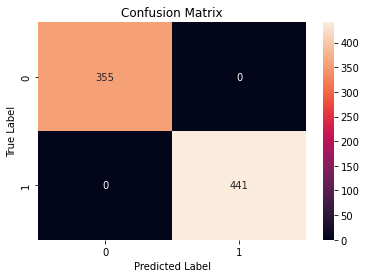

In [92]:
sns.heatmap(conf_matrix,annot = True,fmt = ".3g")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.title("Confusion Matrix")
plt.plot()


#ROC Curve

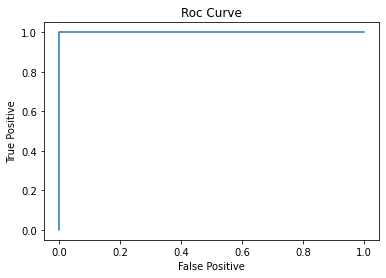

In [93]:
fpr,tpr, threshold = roc_curve(Y_test,gscv_predictions)
auc_model = auc(fpr,tpr)
plt.plot(fpr,tpr,linestyle = "-")
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.title("Roc Curve")
plt.show()

#Hyperparameter tuning using Random Search CV


In [94]:
rscv = RandomizedSearchCV(model,paramters)
rscv.fit(X_train,Y_train)
rscv_predictions = gscv.predict(X_test)
print(rscv.best_params_)
print(rscv.best_score_)


{'solver': 'newton-cg', 'penalty': 'l2', 'max_iter': 400, 'C': 5}
0.9946164101672318


# Test Accuracy

In [95]:
accuracy_score(Y_test,rscv_predictions)

1.0

#Classification Report

In [96]:
print(classification_report(Y_test,rscv_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       355
           1       1.00      1.00      1.00       441

    accuracy                           1.00       796
   macro avg       1.00      1.00      1.00       796
weighted avg       1.00      1.00      1.00       796



#Confusion Matrix of Random Search CV

In [97]:
conf_matrix = confusion_matrix(Y_test,rscv_predictions)
conf_matrix

array([[355,   0],
       [  0, 441]])

[]

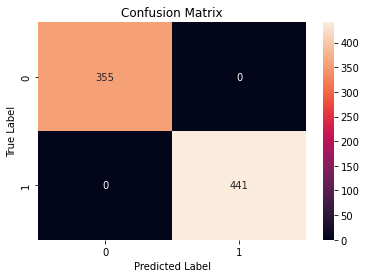

In [98]:
sns.heatmap(conf_matrix,annot = True,fmt = ".3g")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.title("Confusion Matrix")
plt.plot()


#ROC Curve

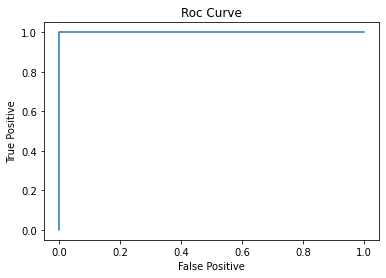

In [99]:
fpr,tpr, threshold = roc_curve(Y_test,rscv_predictions)
auc_model = auc(fpr,tpr)
plt.plot(fpr,tpr,linestyle = "-")
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.title("Roc Curve")
plt.show()

#Model with best  hyperparameters

In [100]:
lr = LogisticRegression(C = 25,max_iter=100,penalty="l2" ,solver = "newton-cg" )
lr.fit(X_train,Y_train)
lr_predictions = lr.predict(X_test)

#Test Accuracy

In [101]:
accuracy_score(Y_test,lr_predictions)

1.0

#Classification Report

In [102]:
print(classification_report(Y_test,lr_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       355
           1       1.00      1.00      1.00       441

    accuracy                           1.00       796
   macro avg       1.00      1.00      1.00       796
weighted avg       1.00      1.00      1.00       796



#Confusion matrix with best parameters

In [103]:
conf_matrix = confusion_matrix(Y_test,lr_predictions)
conf_matrix

array([[355,   0],
       [  0, 441]])

[]

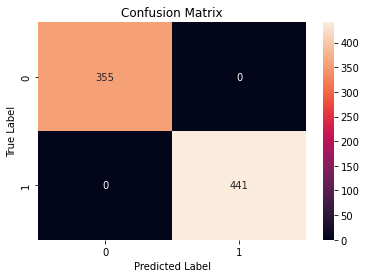

In [104]:
sns.heatmap(conf_matrix,annot = True,fmt = ".3g")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.title("Confusion Matrix")
plt.plot()


#ROC Curve

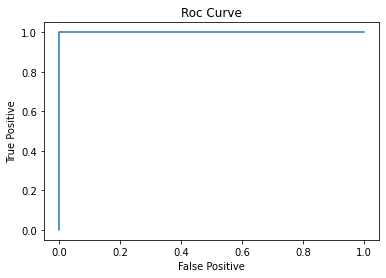

In [105]:
fpr,tpr, threshold = roc_curve(Y_test,lr_predictions)
auc_model = auc(fpr,tpr)
plt.plot(fpr,tpr,linestyle = "-")
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.title("Roc Curve")
plt.show()

#Feature Engineering

In [106]:

feature_select = ExtraTreesRegressor()
feature_select.fit(X_train,Y_train) 
feature_select.feature_importances_

array([6.77451233e-04, 5.71753073e-04, 3.86652946e-04, 2.99946399e-04,
       5.21973139e-04, 9.97542223e-01])

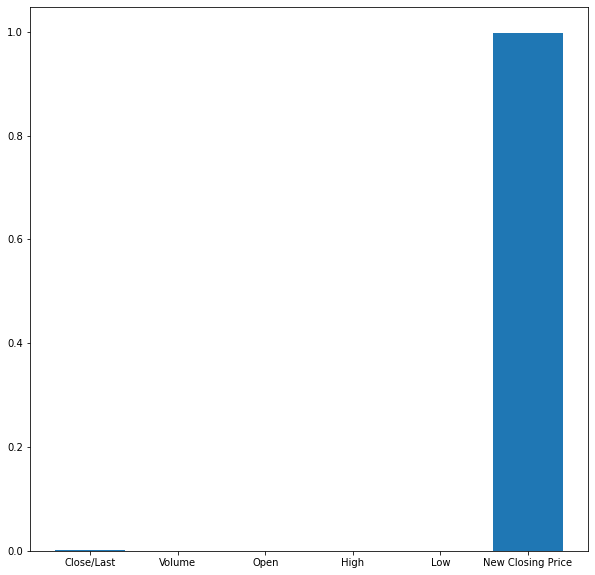

'\nTarget Variable is totally dependant on New Closing Price Column\n'

In [107]:
plt.figure(figsize=(10,10))
plt.bar(X_train.columns,feature_select.feature_importances_)
plt.show()

"""
Target Variable is totally dependant on New Closing Price Column
"""

In [108]:
lr_with_fe = LogisticRegression(C = 25,max_iter=100,penalty="l2" ,solver = "newton-cg" )
lr_with_fe.fit(X_train[["New Closing Price"]],Y_train)
lr_predictions = lr_with_fe.predict(X_test[["New Closing Price"]])

#Test Accuracy

In [109]:
accuracy_score(Y_test,lr_predictions)

1.0

#Classification Report

In [110]:
print(classification_report(Y_test,lr_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       355
           1       1.00      1.00      1.00       441

    accuracy                           1.00       796
   macro avg       1.00      1.00      1.00       796
weighted avg       1.00      1.00      1.00       796



#Confusion Matrix

In [111]:
conf_matrix = confusion_matrix(Y_test,lr_predictions)
conf_matrix

array([[355,   0],
       [  0, 441]])

[]

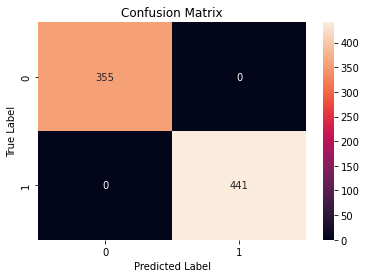

In [112]:
sns.heatmap(conf_matrix,annot = True,fmt = ".3g")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.title("Confusion Matrix")
plt.plot()


#ROC Curve

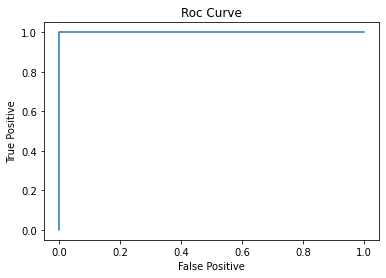

In [113]:
fpr,tpr, threshold = roc_curve(Y_test,lr_predictions)
auc_model = auc(fpr,tpr)
plt.plot(fpr,tpr,linestyle = "-")
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.title("Roc Curve")
plt.show()

#Saving the Model

In [ ]:
pickle.dump(lr,open("lr.pkl","wb"))